### Logistic Regression - SUV data

### Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load and Review the Data

In [2]:
df=pd.read_csv('suv_data.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Explore the Data

In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


### Analyse the Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

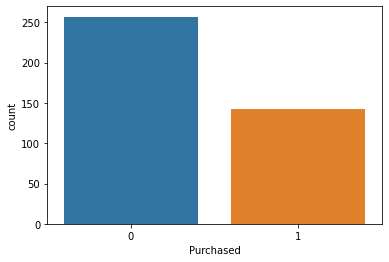

In [11]:
sns.countplot(x="Purchased",data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

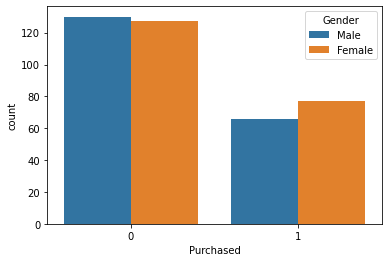

In [12]:
sns.countplot(x="Purchased",hue="Gender",data=df)

### Data Wrangling

In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

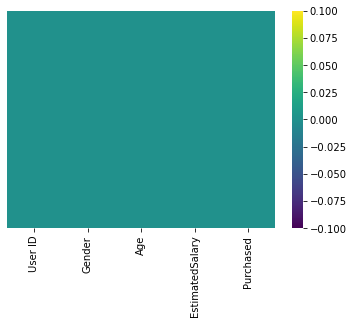

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [15]:
df.drop("User ID",axis=1,inplace=True)

In [16]:
df.sample()

,Gender,Age,EstimatedSalary,Purchased
362,Female,47,50000,1


In [17]:
df.shape

(400, 4)

<AxesSubplot:>

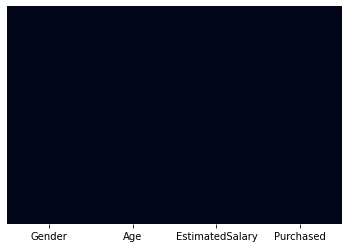

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [20]:
Gender=pd.get_dummies(df["Gender"],drop_first=True,dtype=float)
Gender.head()

,Male
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [21]:
df=pd.concat([df,Gender],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1.0
1,Male,35,20000,0,1.0
2,Female,26,43000,0,0.0
3,Female,27,57000,0,0.0
4,Male,19,76000,0,1.0


In [22]:
df.drop(["Gender"],axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  400 non-null    int64  
 2   Purchased        400 non-null    int64  
 3   Male             400 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


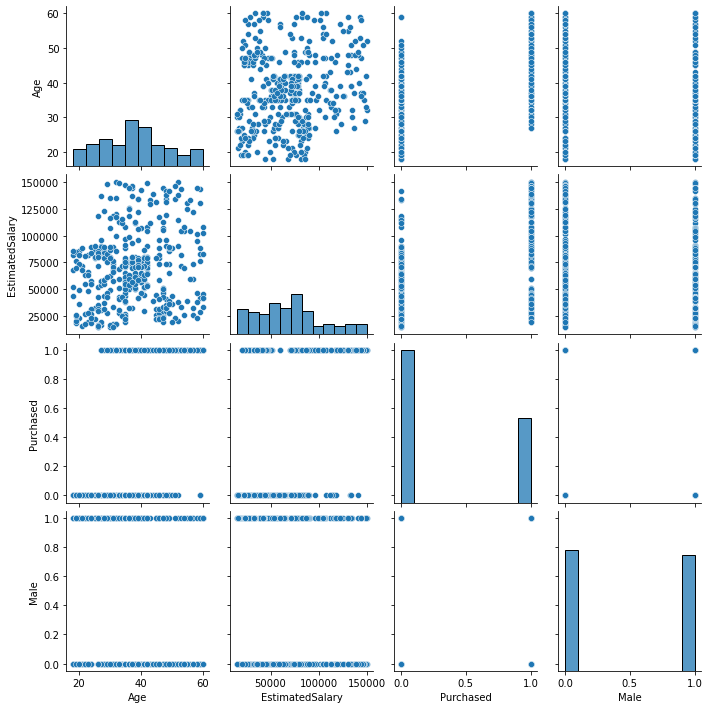

In [24]:
sns.pairplot(data=df)

### Training Data and Testing Data Split

### Split the Data

In [25]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

# Logistic Regression Model

### Fit the Model 1

In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6583333333333333

In [30]:
from sklearn import metrics

In [31]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kenny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[79,  0],
       [41,  0]], dtype=int64)

<AxesSubplot:>

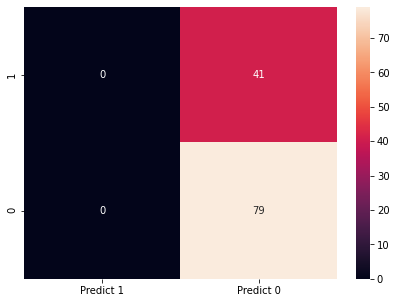

In [33]:

cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [34]:
### how good the model is?
df_cm

,Predict 1,Predict 0
1,0,41
0,0,79


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6583333333333333

#### The accuracy score for model 1 is 0.6583333333333333
#### For improving the score we are trying out standard scaler.

# Fit the model 2

In [36]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
st_x.fit(X)
x_train=st_x.transform(X_train)
x_test=st_x.transform(X_test)

In [37]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [38]:
predictions2=model2.predict(x_test)

In [39]:
accuracy_score(y_test,predictions2)

0.8916666666666667

In [40]:
confusion_matrix(y_test,predictions2)

array([[74,  5],
       [ 8, 33]], dtype=int64)

<AxesSubplot:>

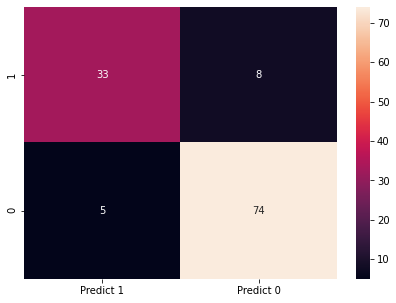

In [41]:
cm2=metrics.confusion_matrix(y_test, predictions2, labels=[1, 0])

df_cm = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [42]:
cm2

array([[33,  8],
       [ 5, 74]], dtype=int64)

#### The accuracy score after scaling is 0.8916666666666667.